본 튜토리얼에서는 고급 **산점도**를 생성하는 방법에 대해 알아봅니다.

# 노트북 설정

늘 그렇듯이 코딩 환경을 설정하는 것부터 시작합니다.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# 데이터 불러오기 및 검사

(_인조의_) 보험 요금 데이터셋을 사용하여 일부 고객이 다른 고객보다 더 많은 비용을 지불하는 이유를 파악할 수 있는지 알아보겠습니다.

![tut3_insurance](https://i.imgur.com/1nmy2YO.png)

데이터셋에 대한 자세한 내용은 [여기](https://www.kaggle.com/mirichoi0218/insurance/home)에서 확인할 수 있습니다.

In [2]:
# 읽을 파일의 경로
insurance_filepath = "../../data/data-for-datavis/insurance.csv"

# insurance_data 변수에 파일을 불러옵니다
insurance_data = pd.read_csv(insurance_filepath)

늘 그렇듯이 처음 다섯 행을 출력하여 데이터셋이 제대로 로드되었는지 확인합니다.

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 산점도

간단한 **산점도**를 생성하기 위해 `sns.scatterplot` 명령어를 사용하고 다음에 대한 값을 지정합니다:
- 수평 x축 (`x=insurance_data['bmi']`)
- 수직 y축 (`y=insurance_data['charges']`)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

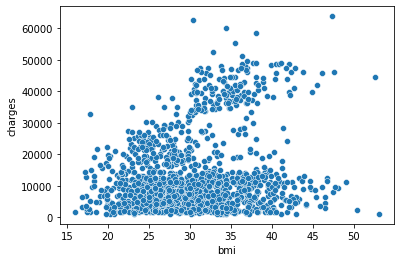

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

위의 산점도를 보면 [체질량지수](https://en.wikipedia.org/wiki/Body_mass_index)(BMI)와 보험료는 **양의 상관관계**가 있으며, BMI가 높은 고객이 일반적으로 보험 비용도 더 많이 지불하는 경향이 있습니다. (_일반적으로 높은 BMI는 높은 만성 질환 부담과 관련이 있기 때문에 이러한 패턴은 타당합니다._)

이 관계의 강도를 재확인하려면 **회귀선** 또는 데이터를 가장 잘 표현하는 선을 추가할 수 있습니다. 명령어를 `sns.regplot`으로 변경하여 이를 수행할 수 있습니다.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

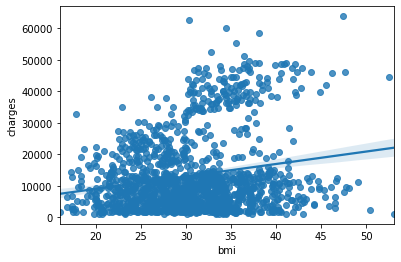

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

# 색이 표시된 산점도

산점도를 사용하여 (_둘이 아니라_) 세 변수의 관계를 나타낼 수 있습니다! 이를 가능하게 하는 방법 중 하나는 점을 색상으로 코딩하는 것입니다.

예를 들어, 흡연이 BMI와 보험 비용의 관계에 어떤 영향을 미치는지 이해하기 위해 `'smoker'`로 점을 색상 코딩하고 나머지 두 열(`'bmi'`, `'charges'`)을 축에 표시할 수 있습니다.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

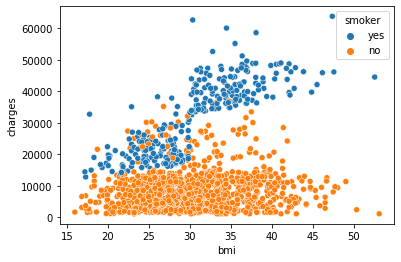

In [6]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

이 산점도를 보면 비흡연자는 BMI가 증가할수록 돈을 조금 더 많이 내는 경향이 있지만 흡연자는 훨씬 더 많이 낸다는 것을 알 수 있습니다.

이 사실을 더욱 강조하기 위해 `sns.lmplot` 명령어를 사용하여 흡연자와 비흡연자에 해당하는 두 개의 회귀선을 추가할 수 있습니다. (_흡연자의 회귀선은 비흡연자의 회귀선에 비해 훨씬 가파른 경사를 보입니다!_)

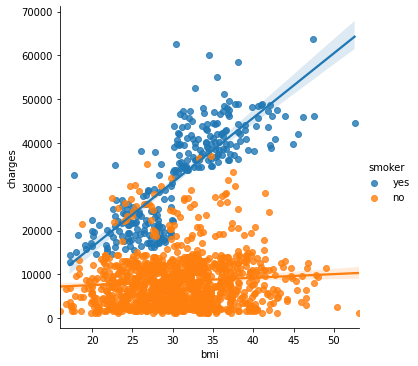

In [7]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

위의 `sns.lmplot` 명령어는 지금까지 배운 명령어들과 약간 다르게 작동합니다:
- `insurance_data`의 `'bmi'` 열을 선택하기 위해 `x=insurance_data['bmi']`로 설정하는 대신 열 이름만을 이용하여 `x="bmi"`로 설정합니다.
- 비슷하게 `y="charges"`와 `hue="smoker"`도 열 이름만을 포함합니다.
- 데이터셋을 `data=insurance_data`로 지정합니다.

마지막으로 지금까지 봐 온 것들과는 조금 다른 산점도가 하나 있습니다. 일반적으로 산점도는 (`"bmi"`와 `"charges"` 같은) 두 연속형 변수의 관계를 강조하기 위해 사용됩니다. 그러나 주축 중 하나에 (`"smoker"` 같은) 범주형 변수를 포함하도록 산점도 디자인을 조정할 수 있습니다. 이러한 플롯 유형을 **범주형 산점도**라고 하며, `sns.swarmplot` 명령어를 이용해 사용합니다.

C:\Users\Yuwol\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

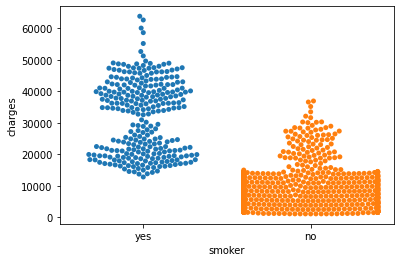

In [8]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

이 도표는 특히 다음을 보여줍니다:
- 평균적으로 비흡연자는 흡연자보다 적은 요금을 지불합니다.
- 돈을 가장 많이 지불하는 고객은 흡연자입니다; 가장 적게 지불하는 고객은 비흡연자입니다.